# Explore Weather Trends

## Outline
<br>

**Step 1:** The data was extracted from the database using SQL Commands. First, the list of cities in United States was extracted from the city_list dataset. Then, San Francisco average temperature data from the city_data dataset and global average temperature data from the gobal_data dataset were joined after the avg_temp columns were renamed.
<br>
```
SELECT *
FROM city_list
WHERE country = 'United States';

ALTER TABLE city_data RENAME COLUMN avg_temp TO local_avg_temp;
ALTER TABLE global_data RENAME COLUMN avg_temp TO global_avg_temp;

SELECT city_data.year, city_data.local_avg_temp, global_data.global_avg_temp
	FROM global_data JOIN city_data
	ON global_data.year = city_data.year
    WHERE city = 'San Francisco';
```
<br>
<br>

**Step 2:** Moving averages of the local (San Francisco) and global temperatures were calculated and plotted using python libraries pandas and matplotlib.pyplot in jupyter notebook. 


In [21]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read file into dataframe
df = pd.read_csv('udacity_project1.csv')
df.head(10)

,year,local_avg_temp,global_avg_temp
0,1849,14.12,7.98
1,1850,13.80,7.90
2,1851,14.39,8.18
3,1852,13.81,8.10
4,1853,14.40,8.04
5,1854,13.98,8.21
6,1855,14.20,8.11
7,1856,14.10,8.00
8,1857,14.78,7.76
9,1858,14.19,8.10


In [23]:
# Calculate moving averages
df['local_MA_temp'] = df.rolling(window=7)['local_avg_temp'].mean()
df['global_MA_temp'] = df.rolling(window=7)['global_avg_temp'].mean()
df.head(10)

,year,local_avg_temp,global_avg_temp,local_MA_temp,global_MA_temp
0,1849,14.12,7.98,NaN,NaN
1,1850,13.80,7.90,NaN,NaN
2,1851,14.39,8.18,NaN,NaN
3,1852,13.81,8.10,NaN,NaN
4,1853,14.40,8.04,NaN,NaN
5,1854,13.98,8.21,NaN,NaN
6,1855,14.20,8.11,14.100000,8.074286
7,1856,14.10,8.00,14.097143,8.077143
8,1857,14.78,7.76,14.237143,8.057143
9,1858,14.19,8.10,14.208571,8.045714


Text(0.5, 1.0, 'San Francisco Weather Trends')

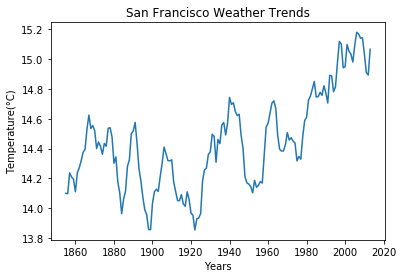

In [24]:
# Plot San Francisco moving averages
plt.plot(data['year'],data['local_MA_temp'])
plt.xlabel("Years")
plt.ylabel("Temperature(°C)")
plt.title("San Francisco Weather Trends")

Text(0.5, 1.0, 'Global Weather Trends')

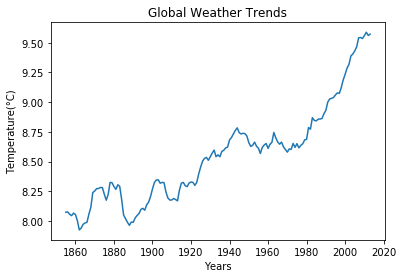

In [25]:
# Plot global moving averages
plt.plot(data['year'],data['global_MA_temp'])
plt.xlabel("Years")
plt.ylabel("Temperature(°C)")
plt.title("Global Weather Trends")

Text(0.5, 1.0, 'Global and San Francisco Weather Trends')

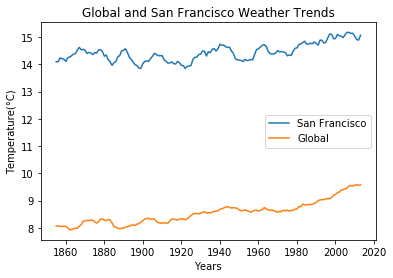

In [26]:
# Plot San Francisco and global moving averages on the same plot
plt.plot(data['year'],data['local_MA_temp'],label='San Francisco')
plt.plot(data['year'],data['global_MA_temp'],label='Global')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature(°C)")
plt.title("Global and San Francisco Weather Trends")

**Step 3:** Observartions about overall temperature trend and the similarities and differences between global and local temperature trends were made

1.	San Francisco average local temperature has increased around 1°C from 1849.
2.	Global average temperature has increased around 1.5°C from 1849.
3.	Both San Francisco local temperature and global temperature shows an overall increasing trend.
4.	San Francisco local temperature is higher (≈6°C) than the global average temperature. 
5.	San Francisco average local temperature fluctuates more than the global average temperature.
<br>

**References**

https://www.1keydata.com/sql/alter-table-rename-column.html <br>
https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/ <br>
https://pythonspot.com/matplotlib-save-figure-to-image-file/

